# Gathering Dataset

In [7]:
!wget https://raw.githubusercontent.com/jebinapriscilla/Datasets/patch-1/Instagram_harassment.csv


--2024-02-04 02:24:02--  https://raw.githubusercontent.com/jebinapriscilla/Datasets/patch-1/Instagram_harassment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 714172 (697K) [text/plain]
Saving to: ‘Instagram_harassment.csv.1’

Instagram_harassmen 100%[===================>] 697.43K  --.-KB/s    in 0.05s   

2024-02-04 02:24:02 (13.5 MB/s) - ‘Instagram_harassment.csv.1’ saved [714172/714172]



# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

# Read the datset using Pandas Library

In [11]:
df = pd.read_csv("Instagram_harassment.csv" , encoding= 'unicode_escape')
df.head(3)

,Instagram,Label
0,yeah I got 2 backups for all that. I just hate...,0
1,I hate using my BB but love my iPhone. Haven'...,0
2,Get fucking real dude.,1


In [12]:
def display_file_info(df,df_name):
        col_name_list      = list(df.columns)
        col_data_type      = [type(col) for col in df.iloc[0,:]]
        null_count_list    = [df[col].isnull().sum() for col in col_name_list]
        unique_count_list  = [df[col].nunique() for col in col_name_list]
        memory_usage_list  = [df[col].memory_usage() for col in col_name_list]
        total_memory_usage = sum(memory_usage_list)
        df_info = pd.DataFrame({'column_name': col_name_list,
                               'column_type': col_data_type,
                               'null_count': null_count_list,
                               'unique_count':unique_count_list})
        print('-------- {} Summary --- {} x rows | {} x cols |approx {:.2f} MB:'
                                          .format(df_name , df.shape[0], df.shape[1],total_memory_usage))
        print( df_info.to_string())


######
display_file_info(df,'Inp_Data')

-------- Inp_Data Summary --- 8817 x rows | 2 x cols |approx 141328.00 MB:
  column_name            column_type  null_count  unique_count
0   Instagram          <class 'str'>           0          8753
1       Label  <class 'numpy.int64'>           0             2


#Count the Prediction Class Label
#1 - Instagram_harassment
#0 - Non-Instagram_harassment

In [13]:
predict_class_count = df.Label.value_counts()
display(predict_class_count)

0    6312
1    2505
Name: Label, dtype: int64

In [14]:
from plotly.offline import iplot
pred_class = ['Instagram_harassment', 'Non-Instagram_harassment' ]
data = [go.Bar(
   x = pred_class,
   y = predict_class_count
)]
fig = go.Figure(data=data)
iplot(fig)

In [15]:
trace = go.Pie(labels = pred_class, values = predict_class_count)
data = [trace]
fig = go.Figure(data = trace)
iplot(fig)

In [16]:
new_dframe = df[['Instagram','Label']]

# Data Preprocessing

In [17]:
new_dframe['Instagram'] = new_dframe['Instagram'].str.lower()


def data_preprocess(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

####


hastag_remove = re.compile(r'<[^>]+>')

def remove_tags(text):
    return hastag_remove.sub('', text)


In [18]:
refined_tweet_1 = []
sentences = list(new_dframe['Instagram'])
for sen in sentences:
    refined_tweet_1.append(data_preprocess(sen))

new_dframe["refined_Instagram"] = refined_tweet_1

# refined data

In [19]:
new_dframe

,Instagram,Label,refined_Instagram
0,yeah i got 2 backups for all that. i just hate...,0,yeah got backups for all that just hate when t...
1,i hate using my bb but love my iphone. haven'...,0,i hate using my bb but love my iphone haven tr...
2,get fucking real dude.,1,get fucking real dude
3,she is as dirty as they come and that crook ...,1,she is as dirty as they come and that crook r...
4,why did you fuck it up. i could do it all day...,1,why did you fuck it up could do it all day to...
...,...,...,...
8812,no caffiene would kick my ass too - i'm addict...,0,no caffiene would kick my ass too m addicted t...
8813,now i'm hungry. damn you people and your midn...,0,now m hungry damn you people and your midnight...
8814,i've taken one also. people just piss me off m...,0,i ve taken one also people just piss me off mo...
8815,that too! or even being able to park pulling ...,0,that too or even being able to park pulling in...


# Training/Testing Splitt

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(new_dframe["refined_Instagram"],new_dframe.Label, test_size = 0.25, random_state = 42)

display("Training Data Shape")
print(X_train.shape , y_train.shape)
display("Test Data Shape")
print(X_test.shape , y_test.shape)

'Training Data Shape'

(6612,) (6612,)


'Test Data Shape'

(2205,) (2205,)


# Tokenizer

In [22]:
data_token = Tokenizer(num_words=100000 )

data_token.fit_on_texts(X_train )

vocab_size = len(data_token.word_index) + 1

maxlen = 100


data_1 = data_token.texts_to_sequences(X_train)
data_1_train = pad_sequences(data_1, maxlen=maxlen)

data_2 = data_token.texts_to_sequences(X_test)
data_2_test = pad_sequences(data_2, maxlen=maxlen)
display(data_1_train.shape)

display(data_1_train)



(6612, 100)

array([[    0,     0,     0, ...,   114,  4322,    20],
       [    0,     0,     0, ...,  4323,     5,    15],
       [    0,     0,     0, ...,    28,    14,   656],
       ...,
       [    0,     0,     0, ...,     3,  4180, 11096],
       [    0,     0,     0, ...,  3347,  1498,  1031],
       [    0,     0,     0, ...,   692,   205, 11102]], dtype=int32)

In [23]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'
!unzip '/content/glove.6B.zip'

--2024-02-04 02:24:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-02-04 02:24:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-04 02:24:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [24]:
#!unzip glove.6B.zip

In [25]:
y = pd.get_dummies(new_dframe.Label).values


# GloVe embeddings to create our feature matrix

In [26]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Load the GloVe word embeddings & to create a dictionary it contain words as keys & their corresponding embedding list as values.

In [27]:
embedding_word_data = zeros((vocab_size, 100))
for word, index in data_token.word_index.items():
    embedding_wod_vec = embeddings_dictionary.get(word)
    if embedding_wod_vec is not None:
        embedding_word_data[index] = embedding_wod_vec

# network Creation

In [30]:
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout1D, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
#from keras.layers.embeddings import Embedding
from keras.layers import Embedding
from keras.layers import LSTM

# Pass the training data & validate the model

In [31]:
model1 = Sequential()

model1 = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_word_data], input_length=maxlen , trainable=False)
model1.add(embedding_layer)
model1.add(LSTM(128))

model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [32]:
display(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1110300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,227,677
Trainable params: 117,377
Non-trainable params: 1,110,300
_________________________________________________________________


None

# Evaluate the Model



In [33]:
history1 = model1.fit(data_1_train, y_train, validation_data=(data_2_test, y_test), epochs=5, batch_size=16 )

score1 = model1.evaluate(data_2_test, y_test, verbose=1)

Epoch 1/5
414/414 [==============================] - 57s 132ms/step - loss: 0.5925 - acc: 0.7149 - val_loss: 0.5584 - val_acc: 0.7356
Epoch 2/5
414/414 [==============================] - 51s 122ms/step - loss: 0.5764 - acc: 0.7226 - val_loss: 0.5743 - val_acc: 0.7329
Epoch 3/5
414/414 [==============================] - 46s 111ms/step - loss: 0.5554 - acc: 0.7326 - val_loss: 0.5731 - val_acc: 0.7243
Epoch 4/5
414/414 [==============================] - 48s 115ms/step - loss: 0.5356 - acc: 0.7435 - val_loss: 0.5819 - val_acc: 0.7374
Epoch 5/5
69/69 [==============================] - 5s 75ms/step - loss: 0.5801 - acc: 0.7329


In [34]:
print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])

Test Score: 0.5800877809524536
Test Accuracy: 0.7328798174858093


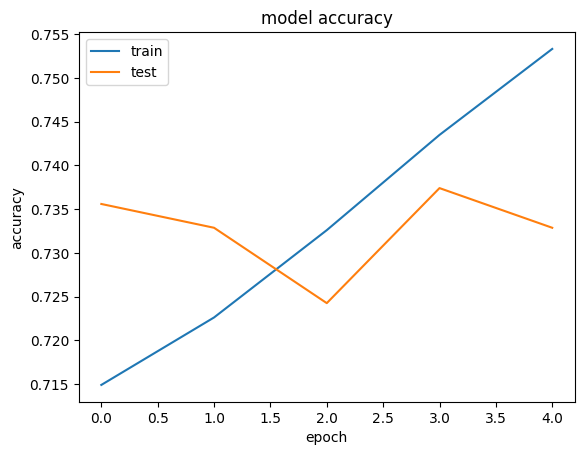

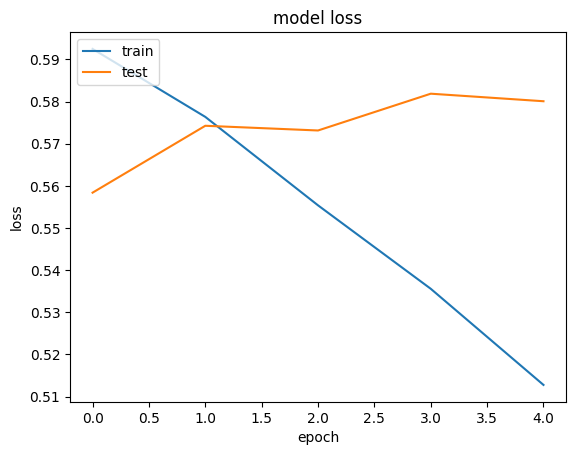

In [35]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# censored_text

In [36]:
!pip install better-profanity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 840.1 kB/s eta 0:00:00


In [37]:
test_case = new_dframe.refined_Instagram[138]
test_case

'stop the hateration bitch it only gonna make that mohawk stand up rotf '

In [38]:
from better_profanity import profanity

if __name__ == "__main__":
    text = test_case

    censored_text = profanity.censor(text, '-')
    print(censored_text)

stop the hateration ---- it only gonna make that mohawk stand up rotf 
